# Data Preparation (Last Names)

https://www.census.gov/topics/population/genealogy/data/2010_surnames.html

`Names_2010Census_Top1000.xlsx'`

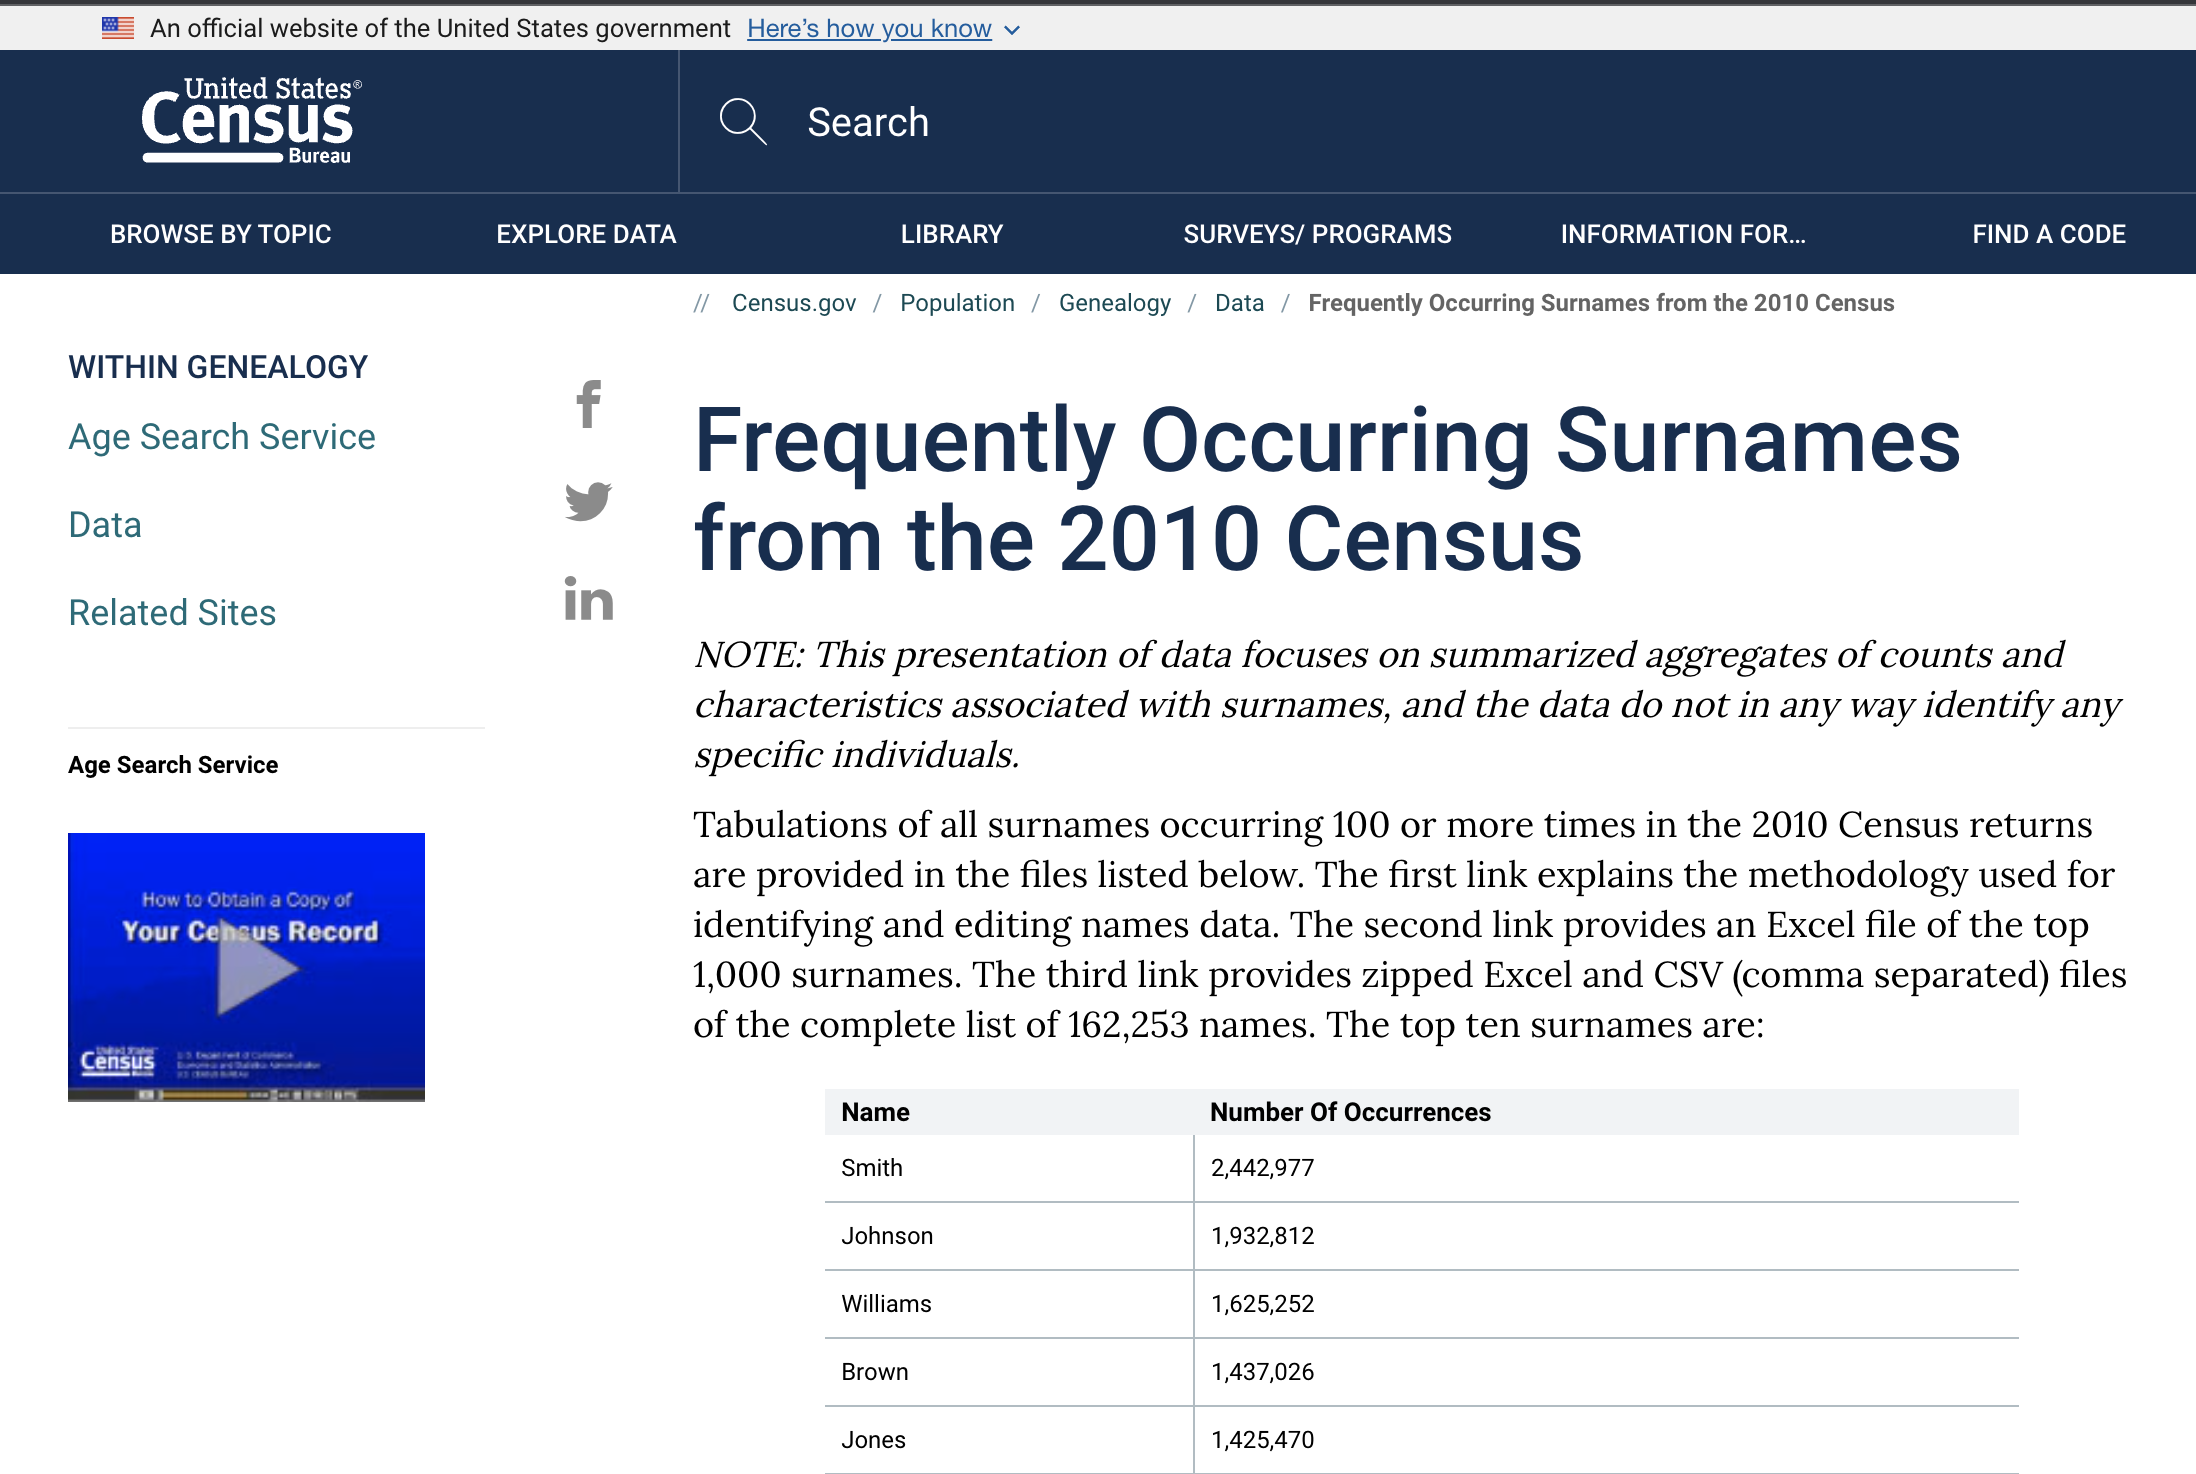

In [18]:
import pandas as pd
import bz2
import pickle

In [25]:
# --- define parameters
url = 'https://www2.census.gov/topics/genealogy/2010surnames/Names_2010Census_Top1000.xlsx'

file_name_output = 'last_names.pbz2'

In [26]:
df_raw = pd.read_excel(url, skiprows=2, nrows=1000)

In [27]:
df_raw.tail()

,SURNAME,RANK,FREQUENCY (COUNT),"PROPORTION PER 100,000 POPULATION",CUMULATIVE PROPORTION,PERCENT NON-HISPANIC OR LATINO WHITE ALONE,PERCENT NON-HISPANIC OR LATINO BLACK OR AFRICAN AMERICAN ALONE,PERCENT NON-HISPANIC OR LATINO ASIAN AND NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE,PERCENT NON-HISPANIC OR LATINO AMERICAN INDIAN AND ALASKA NATIVE ALONE,PERCENT NON-HISPANIC OR LATINO TWO OR MORE RACES,PERCENT HISPANIC OR LATINO ORIGIN
995,ODOM,996,35020,11.87,40920.94,69.03,25.85,0.45,0.58,1.99,2.11
996,DAUGHERTY,997,34987,11.86,40932.80,90.01,4.48,0.47,1.09,1.94,2.00
997,TRAVIS,998,34985,11.86,40944.66,73.32,21.01,0.52,0.53,2.21,2.40
998,TANG,999,34961,11.85,40956.51,2.64,0.62,93.31,0.05,2.13,1.25
999,ARCHER,1000,34949,11.85,40968.36,79.50,13.99,0.60,0.74,2.03,3.13


In [28]:
# -- rename
df = df_raw.rename(columns = {'SURNAME':'name', 'FREQUENCY (COUNT)':'count' })

# --- cast data types
df['count'] = df['count'].astype(int)
df['name'] = df['name'].apply(lambda x: x.title())

In [32]:
with bz2.BZ2File(file_name_output, 'wb') as f:
    pickle.dump(df[['name', 'count']], f)